In [1]:
import os 
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/AML flight prediction /code') # current directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [2]:
cd drive/MyDrive/AML_flight_prediction/code

/content/drive/MyDrive/AML_flight_prediction/code


In [5]:
cd data/model_data


/content/drive/MyDrive/AML_flight_prediction/code/data/model_data


In [6]:
%ls

lgbm_naive_LABcat_CYCtime.npz  Weights-003--1542.00488.hdf5
lgbm_naive_LABcat_LABtime.npz  Weights-003--1548.17163.hdf5
lgbm_naive_LABcat.npz          Weights-003--1549.53357.hdf5
lgbm_naive_LABcat_OHEtime.npz  Weights-003--1549.78076.hdf5
lgbm_naive_OHEcat.npz          Weights-004--1541.03076.hdf5
naive_LABcat_OHEtime_FE.npz    Weights-004--1549.54822.hdf5
trainingAML.csv                Weights-005--1549.06091.hdf5
Weights-001--1537.28162.hdf5   Weights-006--1548.98975.hdf5
Weights-001--1542.79028.hdf5   Weights-006--1549.10706.hdf5
Weights-001--1545.16919.hdf5   Weights-007--1539.40417.hdf5
Weights-001--1547.65686.hdf5   Weights-009--1547.93311.hdf5
Weights-001--1549.19788.hdf5   Weights-009--1548.69714.hdf5
Weights-001--1550.04578.hdf5   Weights-009--1548.92444.hdf5
Weights-001--1550.26367.hdf5   Weights-010--1548.59521.hdf5
Weights-001--1552.76550.hdf5   Weights-010--1565.70618.hdf5
Weights-001--1565.97668.hdf5   Weights-011--1548.18347.hdf5
Weights-002--1535.63342.hdf5   Weights-0

In [7]:
pip install keras

In [22]:
import time

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column

#import keras_metrics as km
from keras import metrics
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

from statistics import mean

print(tf.__version__)

2.7.0


In [68]:

#import time
#start_time = time.time()

## This code is based on code from my bachelor thesis and these websites: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb#scrollTo=ssnVcKg7oMe6

# Make a plot of results
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.title('MSE arrival delay NNW')
  plt.legend()
  plt.grid(True)
  plt.show() 

# Make Neural Network for regression
def NNW(X_train,y_train,X_test):
  normalizer = tf.keras.layers.Normalization(axis=-1)
  normalizer.adapt(np.array(X_train))

  model = tf.keras.Sequential([
      normalizer,
      layers.Dense(units=1)
  ])

  model.add(Dense(128, kernel_initializer='normal',
                                  input_dim = X_train.shape[1], activation='relu'))

  # Hidden Layers
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  model.add(Dense(256, kernel_initializer='normal',activation='relu'))

  # Output Layer
  model.add(Dense(1, kernel_initializer='normal',activation='linear'))

  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  print(model.summary())

  #Weights-197--224.71159.hdf5 PICK best weight, check when model results are not improving and pick that weight for checpoint_name
  checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
  checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
  callbacks_list = [checkpoint]

  history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)
  
  print('loss:',mean(history.history['loss']),'validation loss:',mean(history.history['val_loss']))
    
  print(plot_loss(history))

  print(X_test)
  return model.predict(X_test)

  


In [11]:
cd ..

/content/drive/My Drive/AML_flight_prediction/code/data


In [12]:

df = pd.read_csv('flights_test.csv')
index = df.index


In [69]:
file_name = 'naive_LABcat_OHEtime_FE.npz'

In [67]:
def train_NNW(file_name,index=index):

  # Load numpy arrays from file
  data = np.load(file_name,allow_pickle=True)

  # Contains split up sets, put together
  xx_train = data ['X_train']
  y_train = data['y_train']
  x_test = data['X_test']
  y_test = data['y_test']

  # Take subset (to prevent crashing)
  X_train = np.concatenate((xx_train,x_test))[:300000] 
  y_train = np.concatenate((y_train,y_test))[:300000] 
  
  X_test = data['X_kaggle']

  ## train NNW and save to CSV file.
  results_array = NNW(X_train,y_train,X_test) 
  print(results_array)

  kaggle_submission = pd.read_csv('submit_sample.csv')
  kaggle_submission['ARRIVAL_DELAY'] = results_array
  kaggle_submission.to_csv('submission.csv', index=False) # save to personal gDrive

  return df



In [14]:
ecd model_data

/content/drive/My Drive/AML_flight_prediction/code/data/model_data


In [15]:
%ls

lgbm_naive_LABcat_CYCtime.npz  Weights-003--1542.00488.hdf5
lgbm_naive_LABcat_LABtime.npz  Weights-003--1548.17163.hdf5
lgbm_naive_LABcat.npz          Weights-003--1549.53357.hdf5
lgbm_naive_LABcat_OHEtime.npz  Weights-003--1549.78076.hdf5
lgbm_naive_OHEcat.npz          Weights-004--1541.03076.hdf5
naive_LABcat_OHEtime_FE.npz    Weights-004--1549.54822.hdf5
trainingAML.csv                Weights-005--1549.06091.hdf5
Weights-001--1537.28162.hdf5   Weights-006--1548.98975.hdf5
Weights-001--1542.79028.hdf5   Weights-006--1549.10706.hdf5
Weights-001--1545.16919.hdf5   Weights-007--1539.40417.hdf5
Weights-001--1547.65686.hdf5   Weights-009--1547.93311.hdf5
Weights-001--1549.19788.hdf5   Weights-009--1548.69714.hdf5
Weights-001--1550.04578.hdf5   Weights-009--1548.92444.hdf5
Weights-001--1550.26367.hdf5   Weights-010--1548.59521.hdf5
Weights-001--1552.76550.hdf5   Weights-010--1565.70618.hdf5
Weights-001--1565.97668.hdf5   Weights-011--1548.18347.hdf5
Weights-002--1535.63342.hdf5   Weights-0

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliza  (None, 111)              223       
 tion)                                                           
                                                                 
 dense_78 (Dense)            (None, 1)                 112       
                                                                 
 dense_79 (Dense)            (None, 128)               256       
                                                                 
 dense_80 (Dense)            (None, 256)               33024     
                                                                 
 dense_81 (Dense)            (None, 256)               65792     
                                                                 
 dense_82 (Dense)            (None, 256)               65792     
                                                     

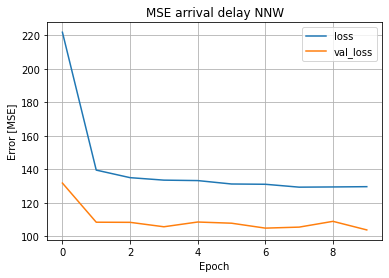

None
[[1.00e+00 0.00e+00 0.00e+00 ... 2.88e+03 2.00e+00 1.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 ... 2.88e+03 3.00e+00 2.40e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 2.88e+03 5.00e+00 1.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 2.29e+02 9.00e+00 5.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 4.80e+01 9.00e+00 1.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 3.50e+01 1.00e+00 2.00e+00]]
[[58492464.]
 [58492430.]
 [58492444.]
 ...
 [58492420.]
 [58492430.]
 [58492428.]]


In [70]:
results = train_NNW('naive_LABcat_OHEtime_FE.npz')

In [ ]:
# This is to prevent 'are you still there? Are you a robot?
while True:pass